In [1]:
from helper.synthesis import create_features_linspace
%load_ext autoreload
%autoreload 2

# import os
# path_parent = os.path.dirname(os.getcwd())
# os.chdir(path_parent)
# os.getcwd()

In [2]:
from analysis.gridbased import model

In [3]:
model_type = 'dense'
parameterization = 'svensson'
models = model.init_model(model_type = model_type, parameterization = parameterization)

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  300       
                                                                 
 dense_1 (Dense)             multiple                  930       
                                                                 
 dense_2 (Dense)             multiple                  930       
                                                                 
 dense_3 (Dense)             multiple                  1953      
                                                                 
 reshape (Reshape)           multiple                  0         
                                                                 
Total params: 4,113
Trainable params: 4,113
Non-trainable params: 0
_________________________________________________________________


In [4]:
import os
os.getcwd()

'/Users/samaypanwar/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Uni/FYP/FYP-Code'

100%|██████████| 250/250 [02:16<00:00,  1.83it/s]


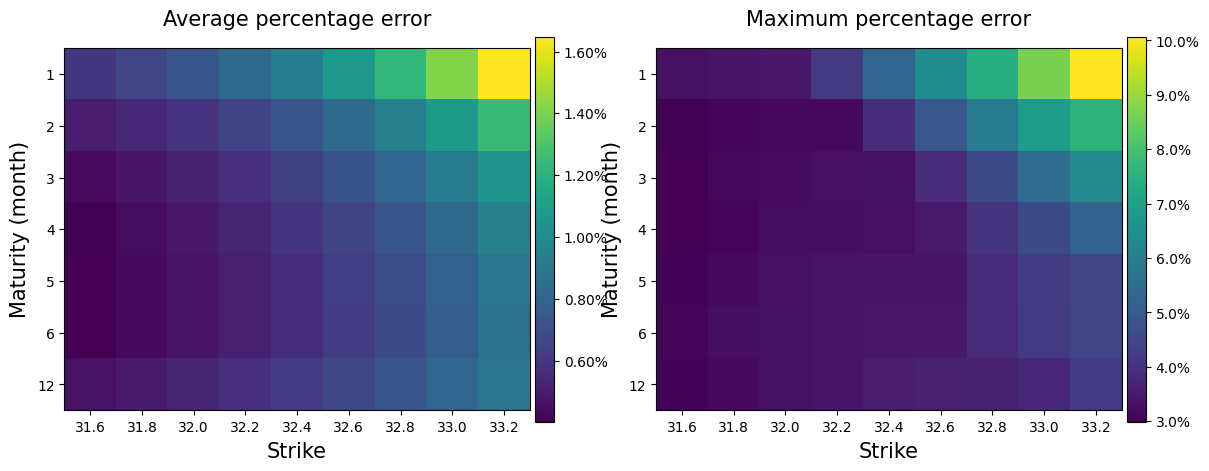

In [54]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
# print(os.getcwd())
model.train_model(models, epochs = 250, model_type = model_type, parameterization = parameterization)

In [5]:
model.load_weights(models, model_type = model_type, parameterization = parameterization)

In [6]:
params_range_train, params_range_test, price_train, price_test = model.load_data(parameterization = parameterization)

100%|██████████| 1000/1000 [00:06<00:00, 148.15it/s]


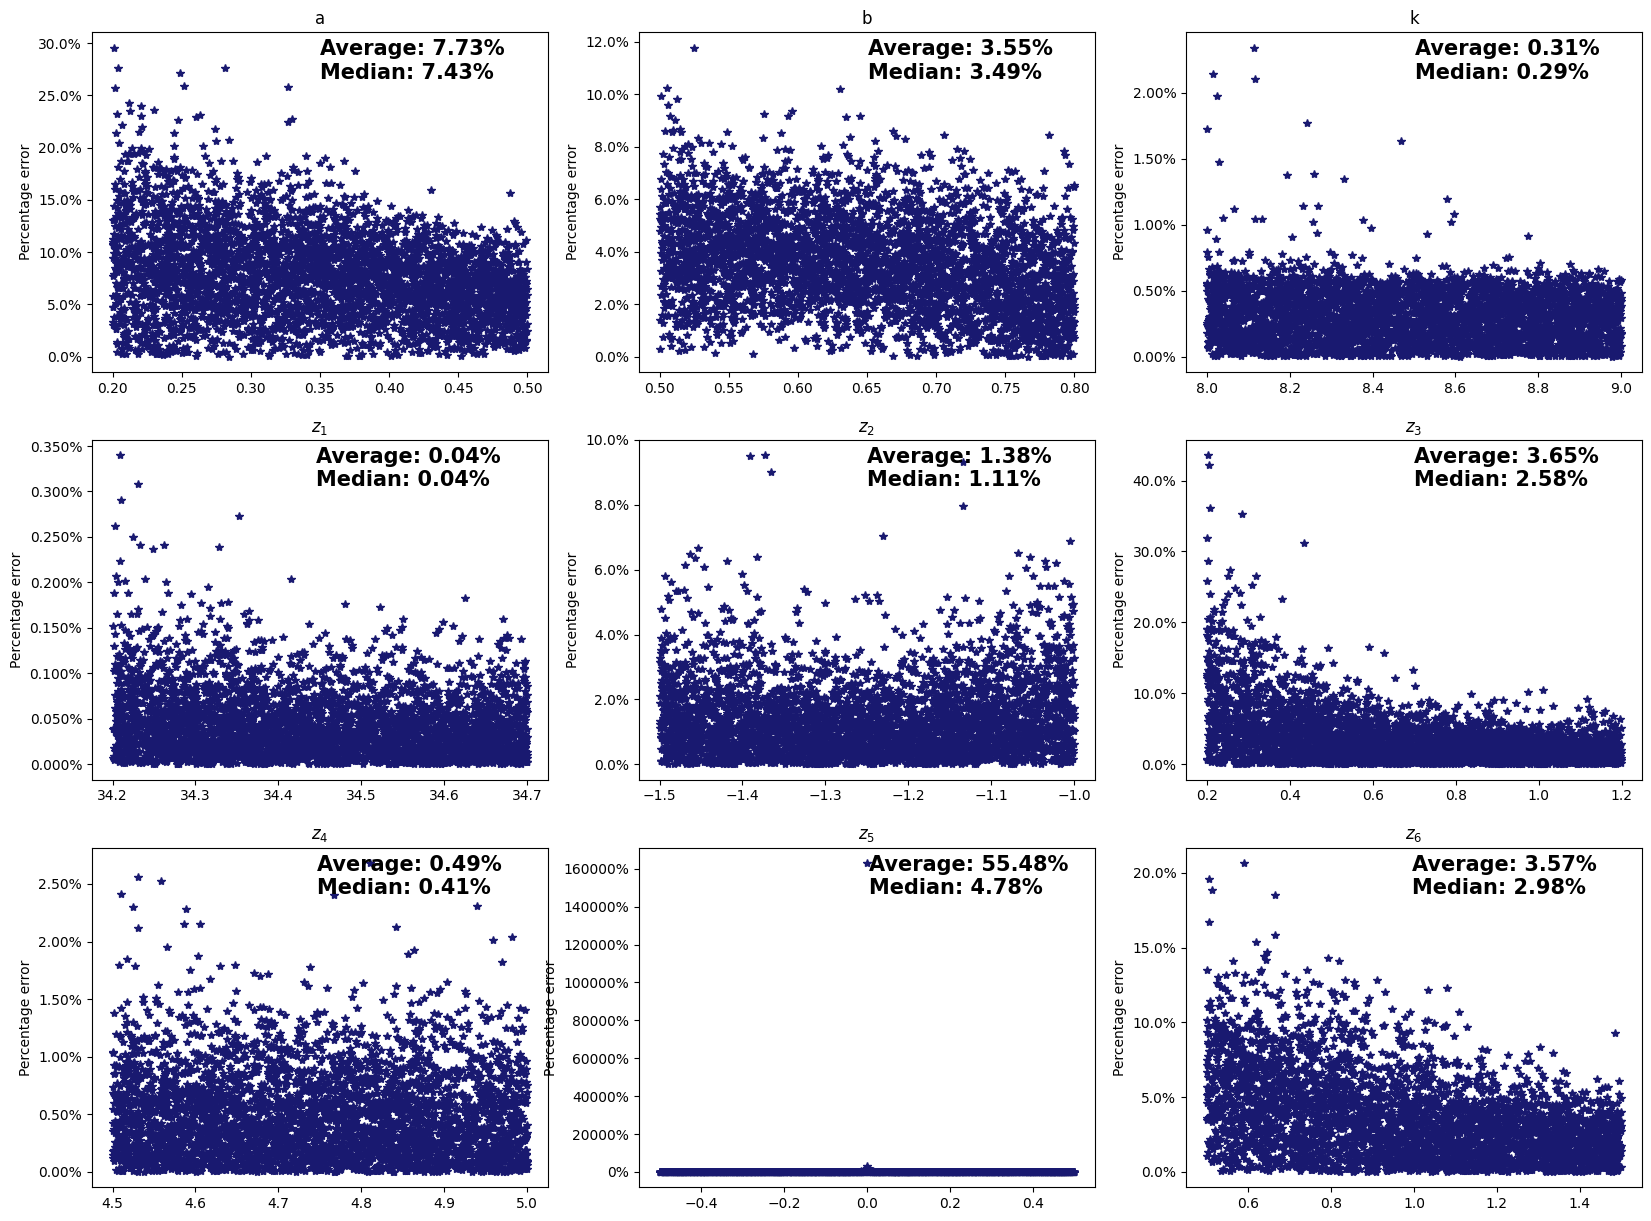

In [12]:
model.calibrate(model = models, prices = price_test, parameters = params_range_test, epochs = 1000, model_type = model_type, parameterization = parameterization, plot = True)

In [8]:
params_range_test.shape

(4000, 9)

In [1]:
from helper.synthesis import create_features_linspace
%load_ext autoreload
%autoreload 2


In [2]:
from analysis.pointwise import model as pointwise_model

In [3]:
import os
os.getcwd()

'/Users/samaypanwar/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Uni/FYP/FYP-Code'

In [4]:
parameterization = 'nelson_siegel'
pointwise_models = pointwise_model.init_model(model_type = 'dense', parameterization = parameterization)

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  300       
                                                                 
 dense_1 (Dense)             multiple                  930       
                                                                 
 dense_2 (Dense)             multiple                  930       
                                                                 
 dense_3 (Dense)             multiple                  31        
                                                                 
Total params: 2,191
Trainable params: 2,191
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 250/250 [02:54<00:00,  1.43it/s]


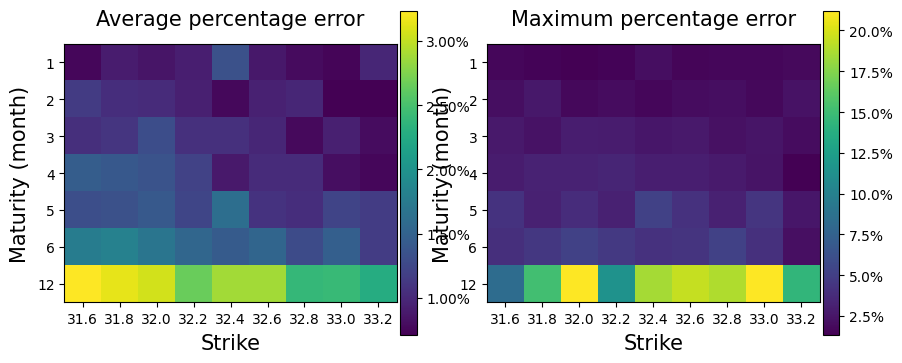

In [6]:
pointwise_model.train_model(pointwise_models, epochs = 250, model_type = 'dense', parameterization = parameterization)

In [8]:
pointwise_model.load_weights(pointwise_models, parameterization = parameterization)
params_range_train, params_range_test, price_train, price_test = pointwise_model.load_data(parameterization = parameterization)

100%|██████████| 4000/4000 [1:34:40<00:00,  1.42s/it]    


[[32.05840695  0.76187139  0.45573115 ... -1.31726238  0.40042728
   4.79928484]
 [31.99898786  0.09816689  0.30052425 ... -1.35730087  0.73570509
   4.82377006]
 [32.61339717  0.3311982   0.4924908  ... -1.19306353  0.8904044
   4.55283413]
 ...
 [32.31201079  0.19208498  0.32529281 ... -1.44587039  0.63497629
   4.61034258]
 [32.84273398  0.7404544   0.3721117  ... -1.10416824  1.00826982
   4.87543751]
 [31.85246443  0.60585514  0.4112532  ... -1.08488007  0.39313929
   4.63998697]]


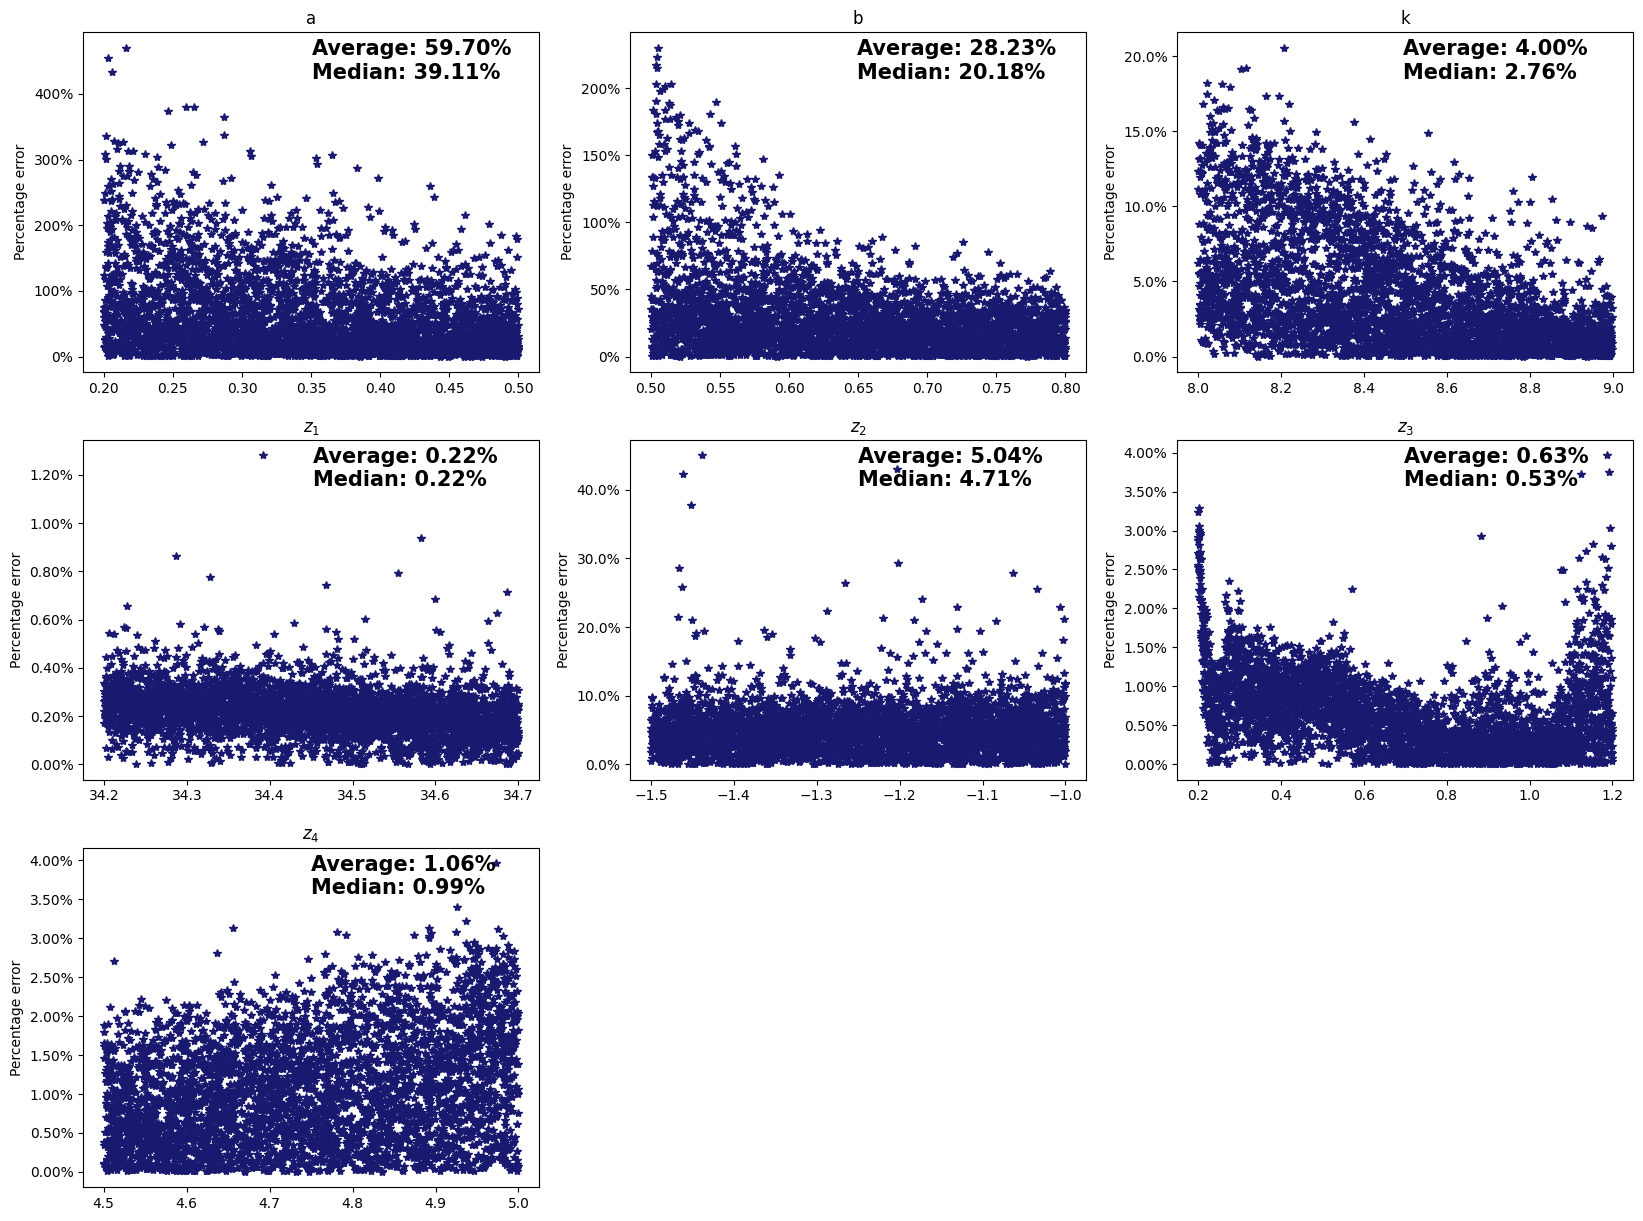

In [15]:
pointwise_model.calibrate(model = pointwise_models, prices = price_test, parameters = params_range_test, parameterization = parameterization, plot = True
                )

In [7]:
params_range_test.s

(4000, 9)

In [15]:
from helper.parameterizations import SvenssonCurve

In [16]:
sc = SvenssonCurve(parameters = [6.6, -5, -100, 10, -0.5, 1])

In [23]:
sc.calculate_average_integral_curve(0, 3)

5.941631173191975

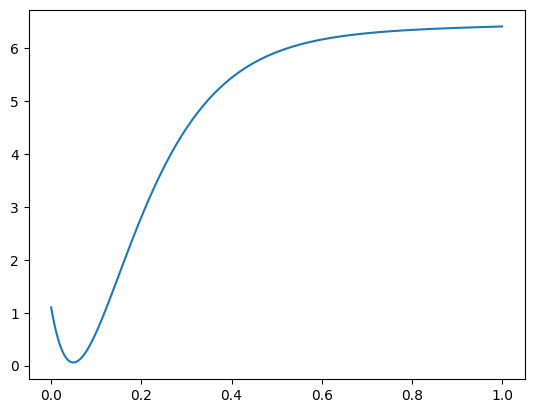

In [41]:
y = []
import numpy as np
x = np.linspace(0, 1, 1001)
for i in x:
  y.append(sc(i))

import matplotlib.pyplot as plt

plt.plot(x, y)

In [46]:
from helper.synthesis import generate_grid_data, generate_pointwise_data

In [47]:
generate_grid_data(parameterization = 'svensson')

100%|██████████| 44000/44000 [19:33<00:00, 37.48it/s]


Data successfully generated!


In [48]:
generate_pointwise_data(parameterization = 'svensson')

Data successfully generated!


In [1]:
%load_ext autoreload
%autoreload 2

import os
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
os.getcwd()

'/Users/samaypanwar/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Uni/FYP/FYP-Code'

In [2]:
from helper.parameterizations import VasicekModel
from helper.utils import BondPricing
from helper.synthesis import generate_grid_data, generate_pointwise_data

In [27]:
vm = VasicekModel(parameters = [0.01, 0.2, 0.2, 0.01])

In [30]:
bp = BondPricing(parameters = [0.01, .3, .2, 0.01])

In [32]:
bp(1)

99.22117535608255

r ̄ = 0.042994 (0.0080023) κ = 0.162953 (0.053703)
σ = 0.015384 (0.00099592).


In [29]:
vm(1)

(0.0010710195758648622, -0.9063462346100909)

In [6]:
0.042994 / 0.162953

0.26384294858026547

In [33]:
generate_grid_data()

100%|██████████| 44000/44000 [00:03<00:00, 11125.48it/s]


Data successfully generated!


In [34]:
generate_pointwise_data()

100%|██████████| 44000/44000 [00:00<00:00, 141907.57it/s]


Data successfully generated!


In [9]:
from analysis.gridbased.model import load_data, init_model, load_weights, train_model

In [35]:
model = init_model()

Model: "dense_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             multiple                  150       
                                                                 
 dense_5 (Dense)             multiple                  930       
                                                                 
 dense_6 (Dense)             multiple                  930       
                                                                 
 dense_7 (Dense)             multiple                  403       
                                                                 
Total params: 2,413
Trainable params: 2,413
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


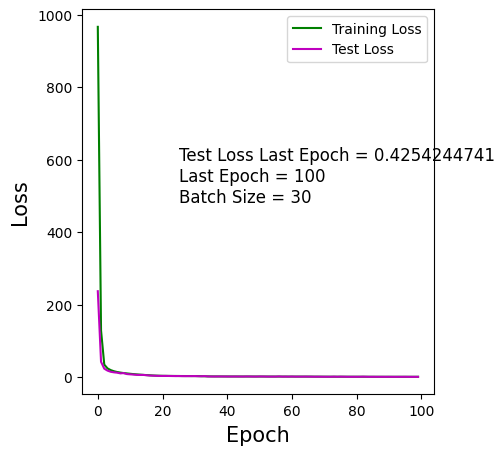

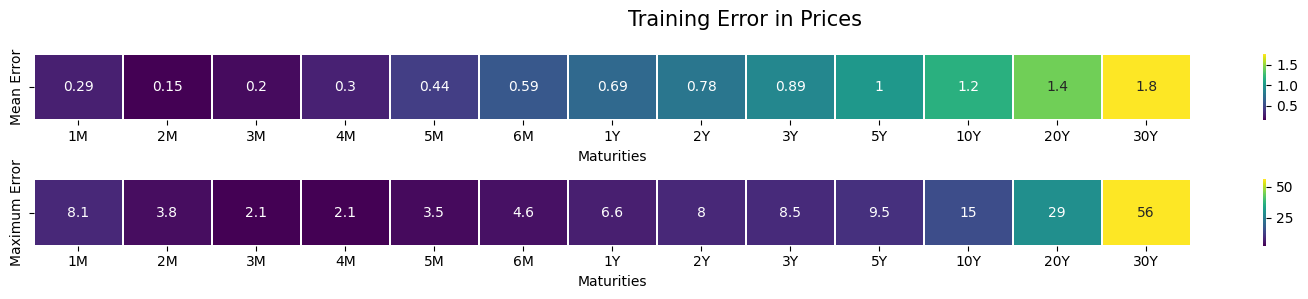

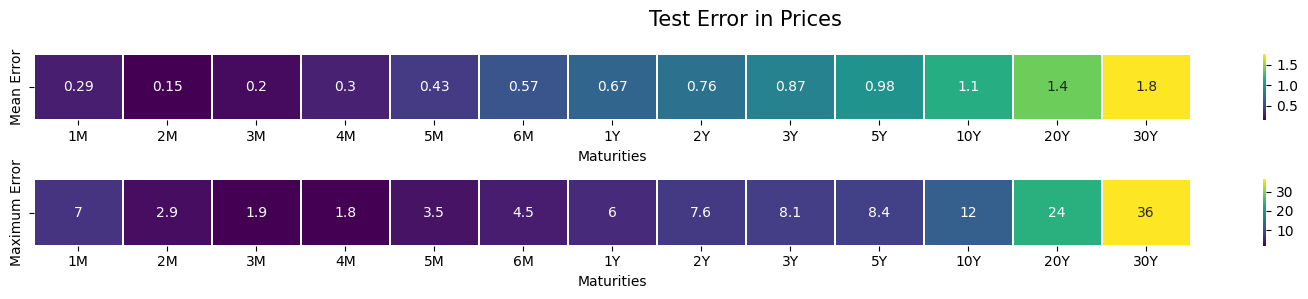

In [36]:
train_model(model = model, epochs = 100)

In [ ]:
a, b, r, sigma, P

In [37]:

a = 0.2638
b = 0.12953 #(0.053703)
sigma = 0.015384 #(0.00099592)
r = 0.02


In [38]:
import numpy as np
from tqdm import tqdm
import random

a_list = np.linspace(0 , 0.2 , 500)
b_list = np.linspace(0.001 , 1 , 500)
sigma_list = np.linspace(0.1, 0.2, 500)
r_list = np.linspace(0.001, 0.07, 500)
maturities = np.linspace(0.1, 30, 500)
random.shuffle(maturities)
random.shuffle(r_list)

sigma_result = []
for sigma_hat, tau in tqdm(zip(sigma_list, maturities)):

    bp = BondPricing(parameters = [a, b, sigma_hat, r])
    price = bp(tau)
    sigma_result.append(price)


500it [00:00, 145736.76it/s]


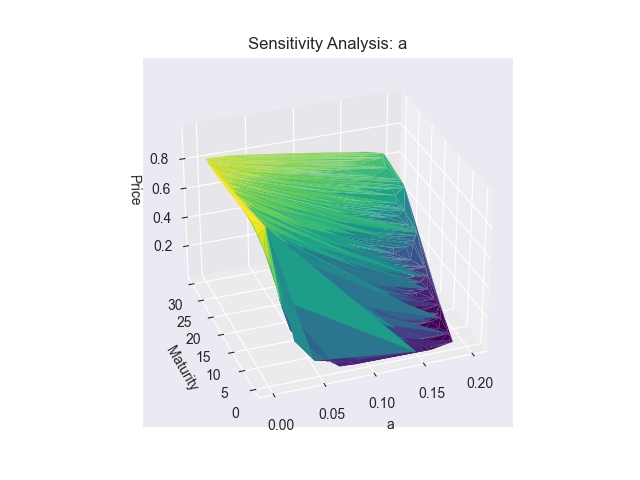

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.plot_trisurf(a_list, maturities, a_result,
                cmap='viridis', edgecolor='none');

ax.set_title('Sensitivity Analysis: a');

ax.set_xlabel('a')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 250, 0)


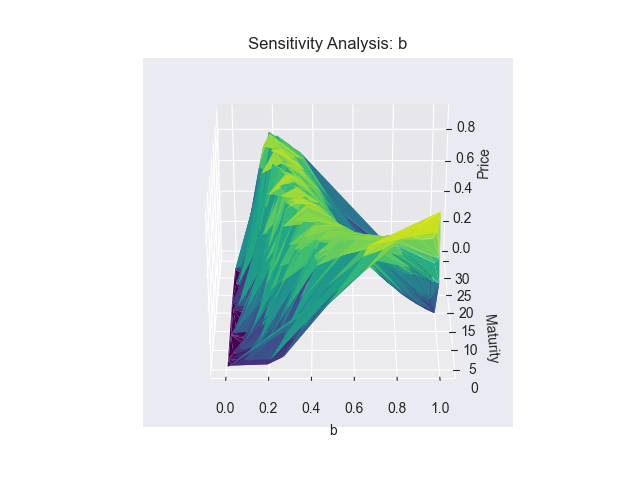

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.plot_trisurf(b_list, maturities, b_result,
                cmap='viridis', edgecolor='none');

ax.set_title('Sensitivity Analysis: b');

ax.set_xlabel('b')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 270, 0)


In [39]:
sigma_result

[17.790860713321738,
 5.554962584283507e-10,
 98.44631068218915,
 82.39670102793906,
 2.297324400191782e-05,
 9.483720953797857e-15,
 2.7969142895152026e-06,
 1.5181373695971002e-13,
 8.809290590199165e-16,
 77.81768239093965,
 1.2491343458455789e-15,
 2.532330239314922e-07,
 1.5156114913755648e-12,
 2.1021570341072767e-09,
 57.992100717212466,
 5.168332791072457e-09,
 5.592945007915553e-05,
 2.476318689976235e-08,
 0.6471704548227936,
 0.5275868020716602,
 6.4538415968515155,
 4.8700230835856094e-14,
 7.239124403491847e-12,
 4.144456950071463e-10,
 6.3079786127104305e-15,
 0.06999180155942125,
 3.9209503577951503e-10,
 4.774818299082982e-06,
 5.6341820555207255e-15,
 6.354996643744389e-07,
 7.970596429317975e-05,
 9.927251258976963e-08,
 7.037777526482131e-12,
 5.791766333569586e-10,
 0.06151337921124082,
 3.8448192081951506e-07,
 0.00010776513083444966,
 7.259124376181881e-08,
 4.0858771409684533e-13,
 4.1520124010863055,
 3.528579083535998e-08,
 0.09118938109210178,
 83.884806453128

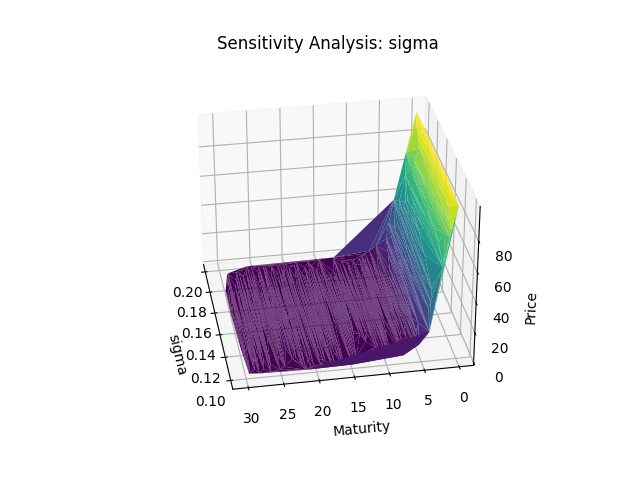

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.plot_trisurf(sigma_list, maturities, sigma_result,
                cmap='viridis', edgecolor='none');

ax.set_title('Sensitivity Analysis: sigma');

ax.set_xlabel('sigma')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 170, 0)

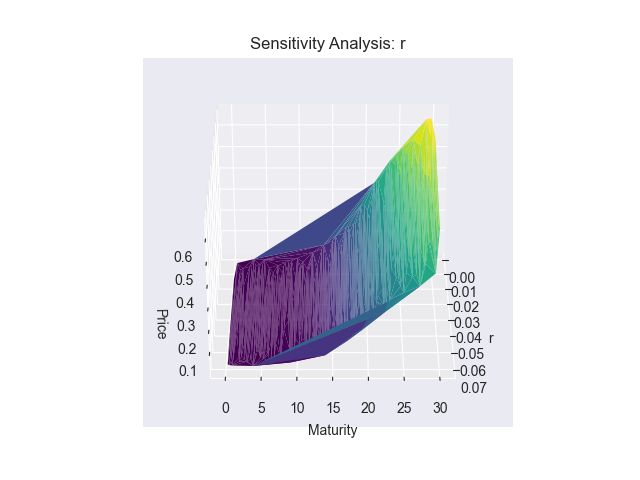

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.plot_trisurf(r_list, maturities, r_result,
                cmap='viridis', edgecolor='none');

ax.set_title('Sensitivity Analysis: r');

ax.set_xlabel('r')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 0, 0)

p is decreasing in r
increasing in sigma
decreasing in a

In [43]:
from analysis.gridbased.model import calibrate

In [44]:
params_range_train, params_range_test, price_train, price_test = load_data()


In [45]:
model.summary()

Model: "dense_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             multiple                  150       
                                                                 
 dense_5 (Dense)             multiple                  930       
                                                                 
 dense_6 (Dense)             multiple                  930       
                                                                 
 dense_7 (Dense)             multiple                  403       
                                                                 
Total params: 2,413
Trainable params: 2,413
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [00:08<00:00, 124.57it/s]


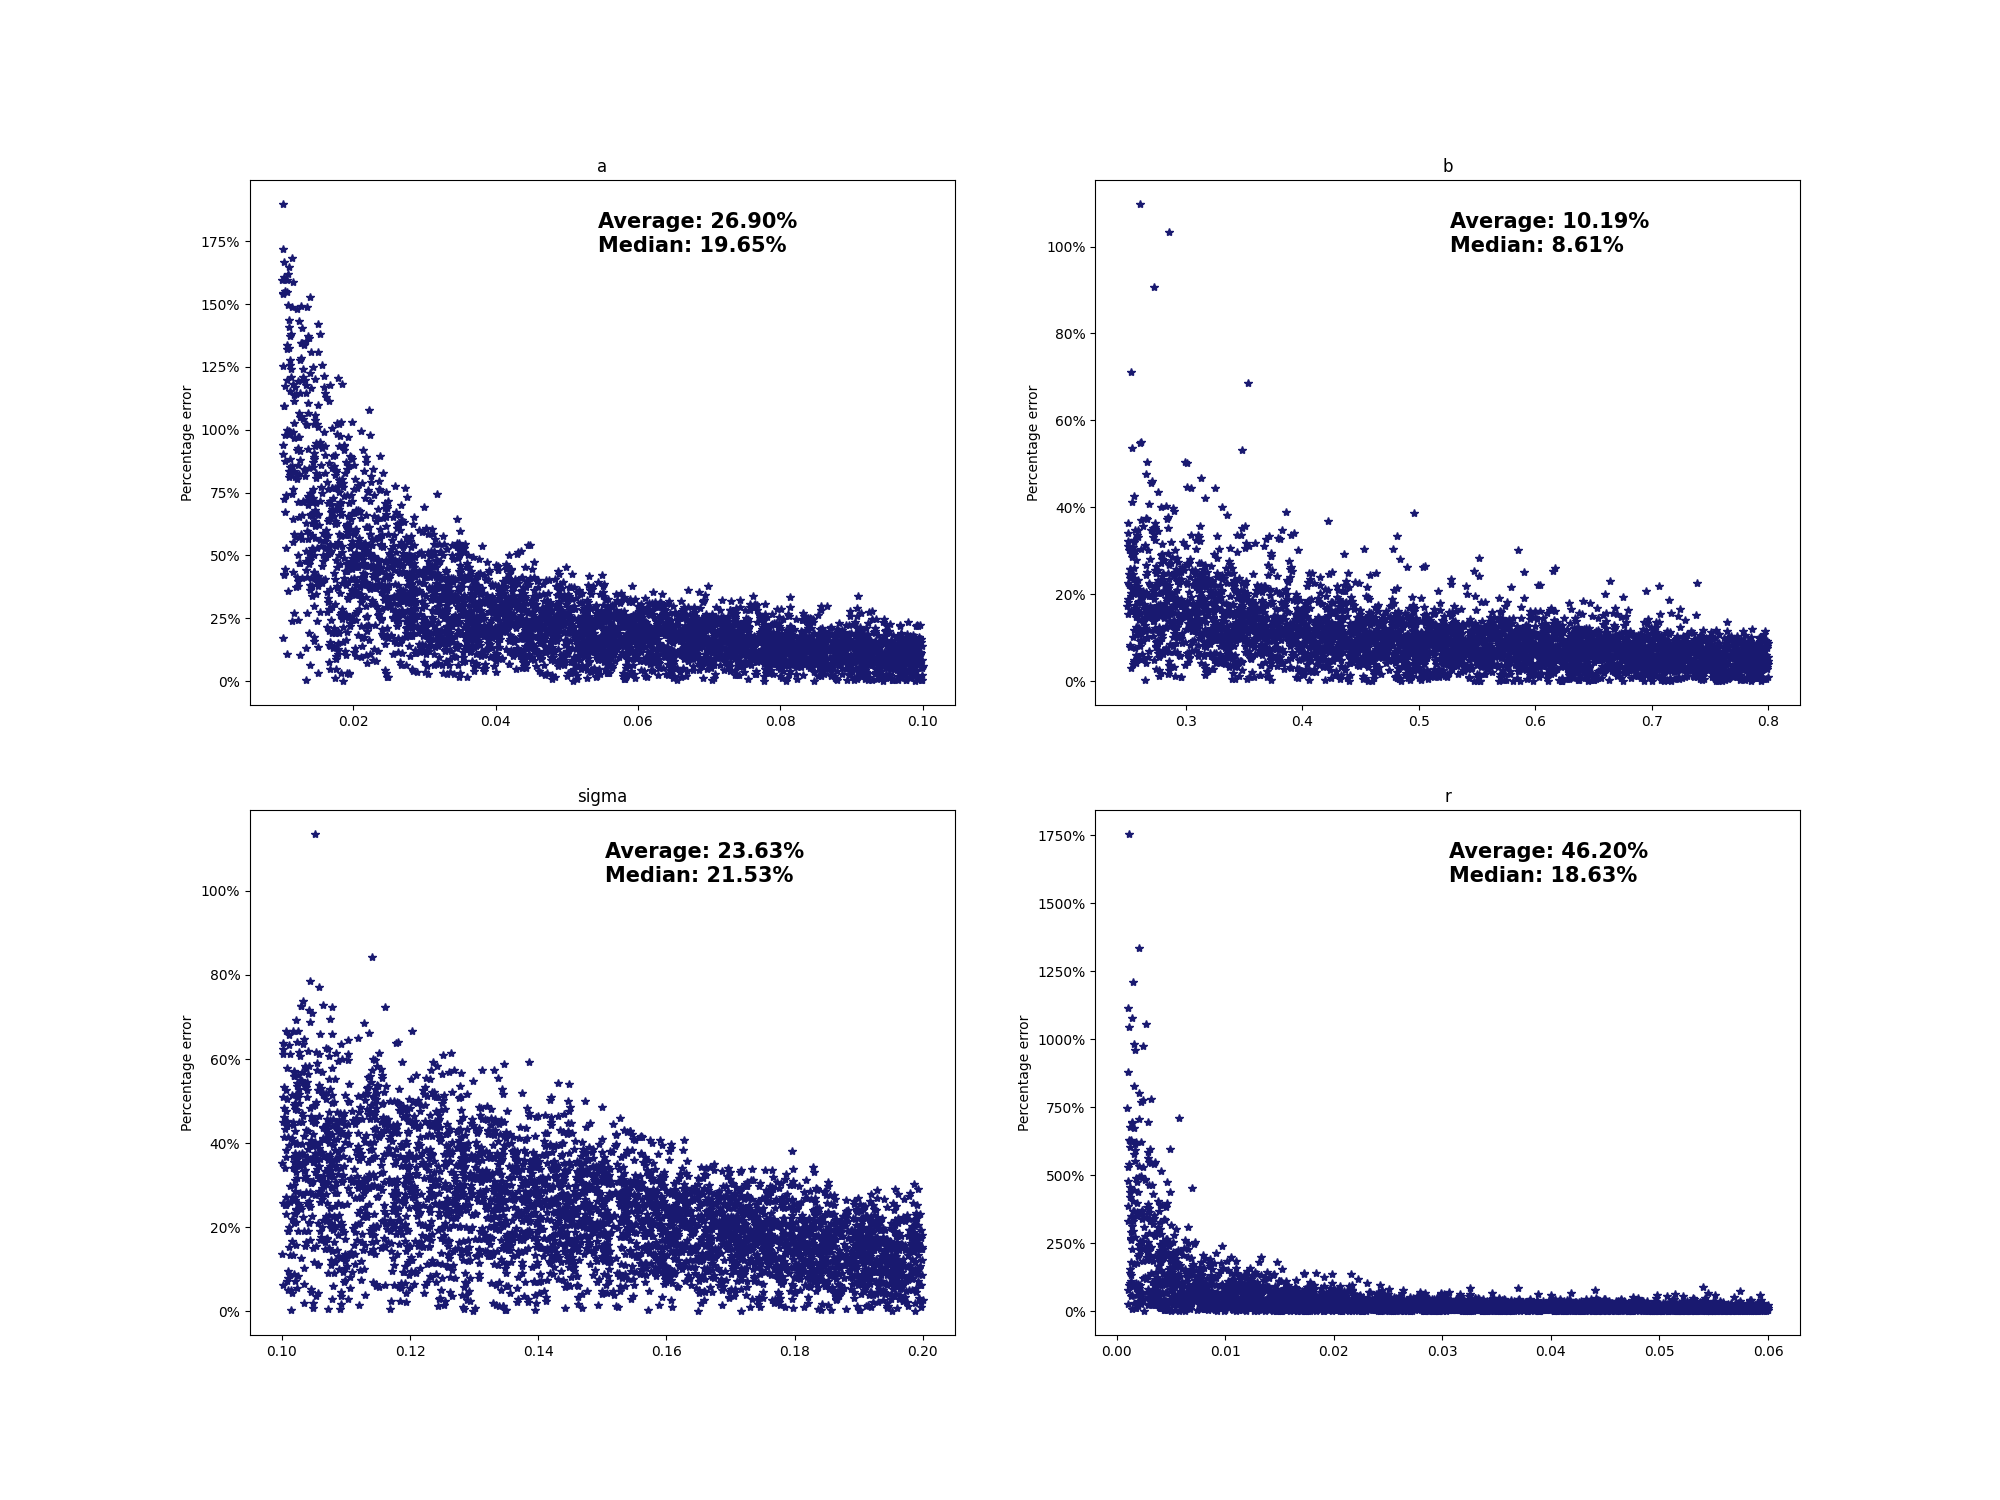

In [46]:
calibrate(model = model, prices = price_test, parameters = params_range_test, plot = True)